>>>

Data Use

Sales Trends Over Time

In [ ]:
from pyspark.sql.functions import to_date, month, year, sum

# Convert order_purchase_timestamp to date and extract year and month
orders_items_products_df = orders_items_products_df.withColumn("purchase_date", to_date(col("order_purchase_timestamp"))) \
                                                   .withColumn("purchase_year", year(col("purchase_date"))) \
                                                   .withColumn("purchase_month", month(col("purchase_date")))

# Aggregate sales by year and month
sales_trends_df = orders_items_products_df.groupBy("purchase_year", "purchase_month") \
                                          .agg(sum("price").alias("monthly_sales")) \
                                          .orderBy("purchase_year", "purchase_month")

# Display the sales trends
sales_trends_df.show(30)


+-------------+--------------+------------------+
|purchase_year|purchase_month|     monthly_sales|
+-------------+--------------+------------------+
|         2016|             9|            267.36|
|         2016|            10| 49507.65999999994|
|         2016|            12|              10.9|
|         2017|             1|120312.87000000029|
|         2017|             2| 247303.0200000005|
|         2017|             3| 374344.2999999998|
|         2017|             4| 359927.2299999995|
|         2017|             5| 506071.1399999976|
|         2017|             6|  433038.599999999|
|         2017|             7|498031.47999999725|
|         2017|             8|  573971.679999995|
|         2017|             9| 624401.6899999944|
|         2017|            10|  664219.429999994|
|         2017|            11|1010271.3699999844|
|         2017|            12| 743914.1699999911|
|         2018|             1| 950030.3599999833|
|         2018|             2|  844178.709999986|


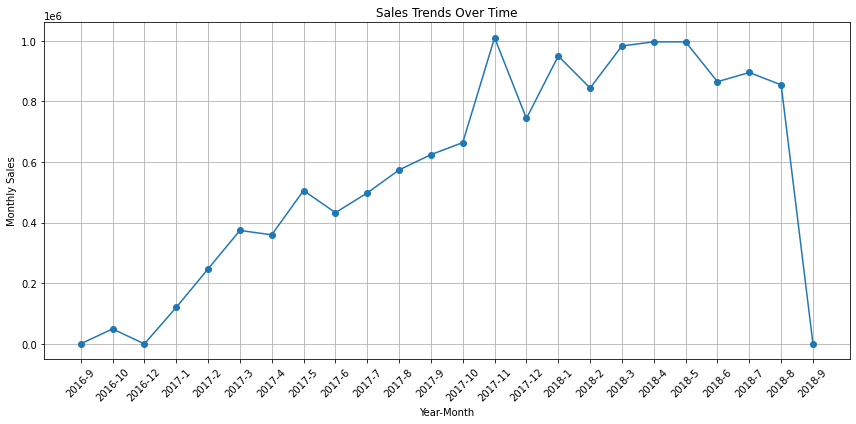

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the sales trends Spark DataFrame to a Pandas DataFrame
sales_trends_pd = sales_trends_df.toPandas()

# Sort the Pandas DataFrame by year and month for plotting
sales_trends_pd.sort_values(by=['purchase_year', 'purchase_month'], inplace=True)

# Create a new column for the x-axis that combines year and month
sales_trends_pd['year_month'] = sales_trends_pd['purchase_year'].astype(str) + '-' + sales_trends_pd['purchase_month'].astype(str)

# Plot the sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(sales_trends_pd['year_month'], sales_trends_pd['monthly_sales'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Monthly Sales')
plt.title('Sales Trends Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


Product Performance Analayis

In [ ]:
from pyspark.sql.functions import desc

# Aggregate sales by product
product_sales_df = orders_items_products_df.groupBy("product_id") \
                                           .agg(sum("price").alias("total_sales")) \
                                           .orderBy(desc("total_sales"))

# Display the top 10 performing products based on sales
product_sales_df.show(10)


+--------------------+------------------+
|          product_id|       total_sales|
+--------------------+------------------+
|bb50f2e236e5eea01...|           63885.0|
|6cdd53843498f9289...|54730.199999999975|
|d6160fb7873f18409...|          48899.34|
|d1c427060a0f73f6b...| 47214.50999999997|
|99a4788cb24856965...| 43025.55999999991|
|3dd2a17168ec895c7...| 41082.59999999995|
|25c38557cf793876c...| 38907.31999999999|
|5f504b3a1c75b73d6...|           37733.9|
|53b36df67ebb7c415...| 37683.41999999996|
|aca2eb7d00ea1a7b8...| 37608.89999999993|
+--------------------+------------------+
only showing top 10 rows



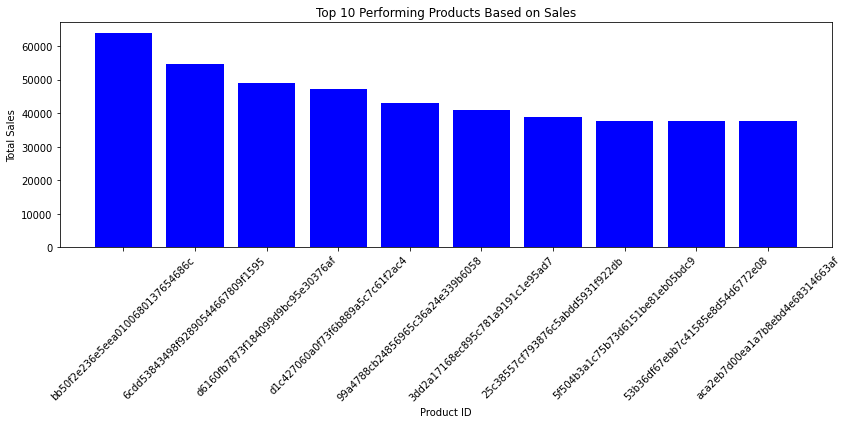

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the product sales Spark DataFrame to a Pandas DataFrame
product_sales_pd = product_sales_df.toPandas()

# Plot the top 10 performing products based on sales
top_products_sales = product_sales_pd.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_products_sales['product_id'], top_products_sales['total_sales'], color='blue')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Top 10 Performing Products Based on Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Customer Segmentation based on location

In [ ]:
# Join orders_customers_reviews_geo with order_items to include price information
orders_customers_geo_sales_df = orders_customers_reviews_geo_df.join(order_items_df, "order_id") \
                                                              .groupBy("customer_state") \
                                                              .agg(countDistinct("order_id").alias("total_orders"),
                                                                   sum("price").alias("total_sales")) \
                                                              .orderBy(desc("total_sales"))

# Display the segmentation results
orders_customers_geo_sales_df.show()


+--------------+------------+--------------------+
|customer_state|total_orders|         total_sales|
+--------------+------------+--------------------+
|            SP|       41094| 7.111612134599996E8|
|            RJ|       12585|4.3537680528999966E8|
|            MG|       11456|3.9549447429999995E8|
|            RS|        5408|1.1140600454000005E8|
|            PR|        4961| 8.543960354000002E7|
|            SC|        3584| 7.843520079999998E7|
|            BA|        3311| 6.216505824999998E7|
|            ES|        1992| 4.235020040000001E7|
|            MT|         894|2.2722864279999994E7|
|            GO|        1985| 2.097763880999999E7|
|            PE|        1627|1.7388249810000002E7|
|            PA|         954|1.5362520730000004E7|
|            DF|        1947|       1.314177497E7|
|            CE|        1313|1.0770098889999999E7|
|            MS|         707|   9994735.870000003|
|            MA|         731|   8984936.770000003|
|            AL|         407|  

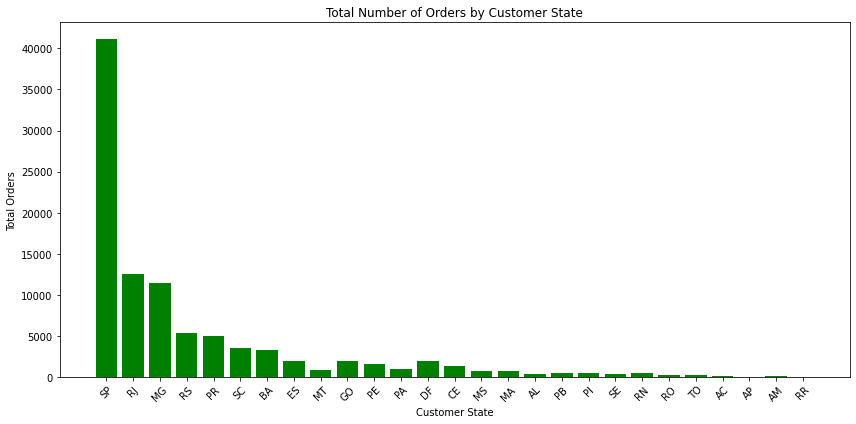

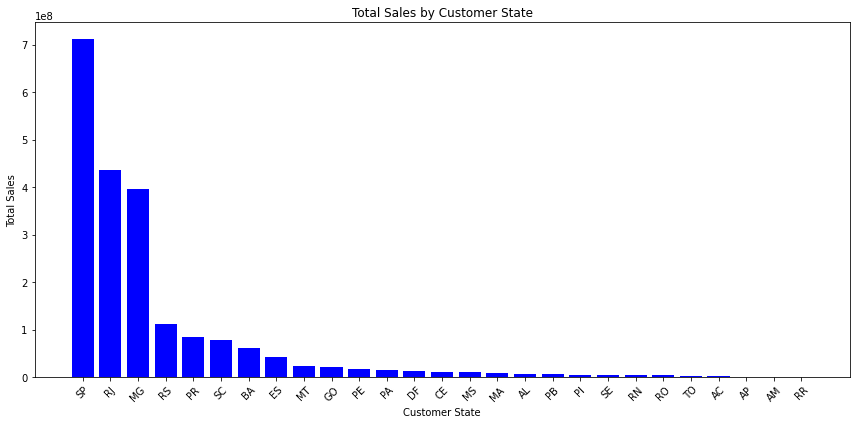

In [ ]:
# Convert the customer segmentation DataFrame to a Pandas DataFrame
orders_customers_geo_sales_pd = orders_customers_geo_sales_df.toPandas()

# Plot the total number of orders by customer state
plt.figure(figsize=(12, 6))
plt.bar(orders_customers_geo_sales_pd['customer_state'], orders_customers_geo_sales_pd['total_orders'], color='green')
plt.xlabel('Customer State')
plt.ylabel('Total Orders')
plt.title('Total Number of Orders by Customer State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Payment method preference

In [ ]:
# Aggregate order count and total sales by payment type
payment_preferences_df = orders_payments_df.groupBy("payment_type") \
                                           .agg(countDistinct("order_id").alias("total_orders"),
                                                sum("payment_value").alias("total_sales")) \
                                           .orderBy(desc("total_sales"))

# Display the payment preferences results
payment_preferences_df.show()


+------------+------------+--------------------+
|payment_type|total_orders|         total_sales|
+------------+------------+--------------------+
| credit_card|       76505|1.2542084189999912E7|
|      boleto|       19784|   2869361.270000001|
|     voucher|        3866|   379436.8699999999|
|  debit_card|        1528|  217989.78999999998|
| not_defined|           3|                 0.0|
+------------+------------+--------------------+



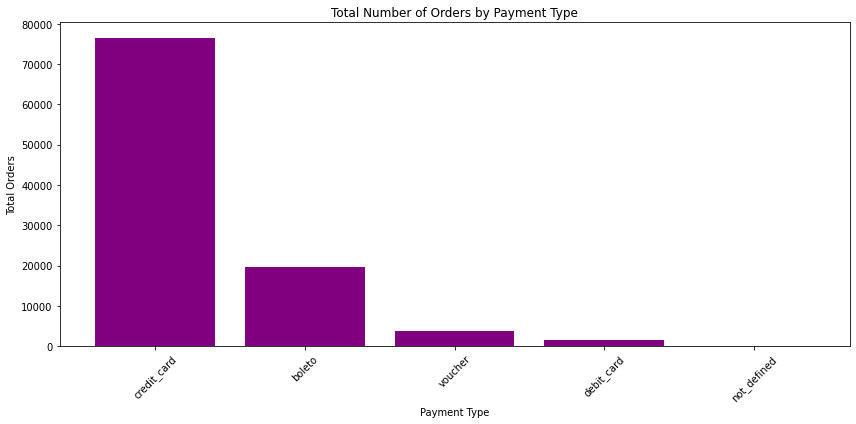

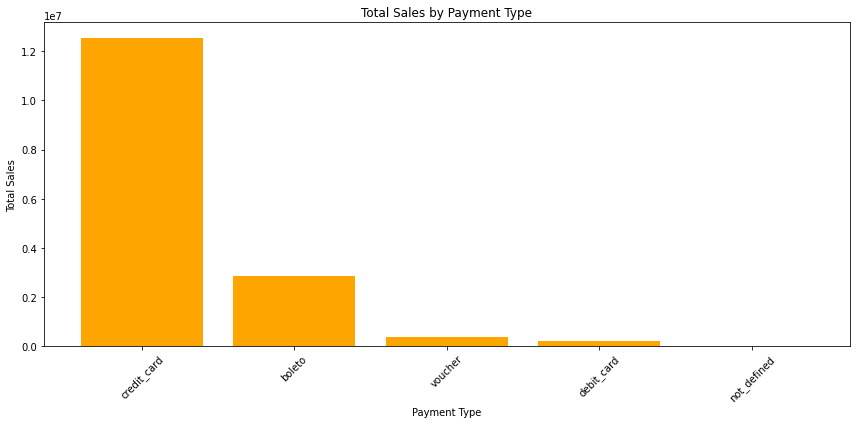

In [ ]:
# Convert the payment preferences DataFrame to a Pandas DataFrame
payment_preferences_pd = payment_preferences_df.toPandas()

# Plot the total number of orders by payment type
plt.figure(figsize=(12, 6))
plt.bar(payment_preferences_pd['payment_type'], payment_preferences_pd['total_orders'], color='purple')
plt.xlabel('Payment Type')
plt.ylabel('Total Orders')
plt.title('Total Number of Orders by Payment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the total sales by payment type
plt.figure(figsize=(12, 6))
plt.bar(payment_preferences_pd['payment_type'], payment_preferences_pd['total_sales'], color='orange')
plt.xlabel('Payment Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Payment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


sales distribution by price range (using new column made in transformation phase)

+-----------+------------------+----------+
|price_range|       total_sales|item_count|
+-----------+------------------+----------+
|       High| 9874530.839999635|     40313|
|     Medium|2480995.7600001153|     33020|
|        Low|1236117.0999999754|     39317|
+-----------+------------------+----------+



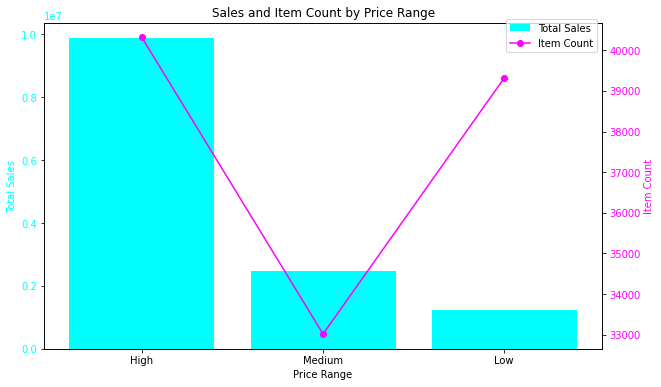

In [ ]:
# Aggregate sales and count items by price range
sales_and_count_by_price_range_df = order_items_df.groupBy("price_range") \
                                                  .agg(sum("price").alias("total_sales"),
                                                       count("order_id").alias("item_count")) \
                                                  .orderBy(desc("total_sales"))

# Display the results
sales_and_count_by_price_range_df.show()

# Visualization
sales_and_count_by_price_range_pd = sales_and_count_by_price_range_df.toPandas()
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total sales by price range
ax1.bar(sales_and_count_by_price_range_pd['price_range'], sales_and_count_by_price_range_pd['total_sales'], color='cyan', label='Total Sales')
ax1.set_xlabel('Price Range')
ax1.set_ylabel('Total Sales', color='cyan')
ax1.tick_params(axis='y', labelcolor='cyan')

# Create a second y-axis to plot item count by price range
ax2 = ax1.twinx()
ax2.plot(sales_and_count_by_price_range_pd['price_range'], sales_and_count_by_price_range_pd['item_count'], color='magenta', marker='o', label='Item Count')
ax2.set_ylabel('Item Count', color='magenta')
ax2.tick_params(axis='y', labelcolor='magenta')

# Add a title and legend
plt.title('Sales and Item Count by Price Range')
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.show()


In [ ]:
Impact of Order Duration on Customer Satisfaction

+---------------------------+--------------------+
|order_duration_days_rounded|average_review_score|
+---------------------------+--------------------+
|                       null|  1.7612565445026178|
|                          1|   4.230769230769231|
|                          2|   4.495547073791348|
|                          3|    4.47832964251819|
|                          4|   4.431168831168831|
|                          5|  4.4257917615400535|
|                          6|   4.391761461564977|
|                          7|   4.381441785347232|
|                          8|   4.375277959450622|
|                          9|  4.3536116044997035|
|                         10|   4.304030519157406|
|                         11|   4.308980755523877|
|                         12|   4.274348422496571|
|                         13|   4.271794871794872|
|                         14|   4.233606557377049|
|                         15|  4.2199267782426775|
|                         16|  

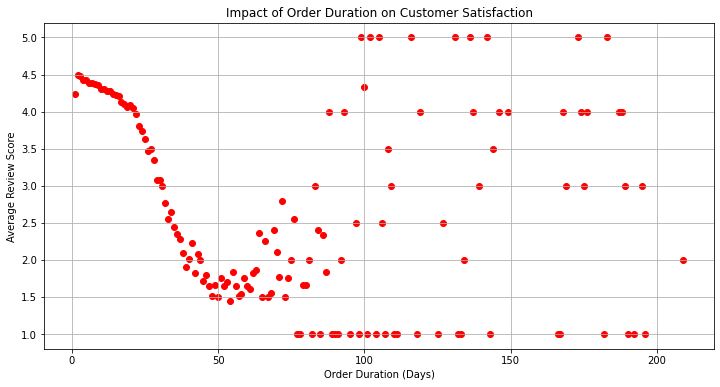

In [ ]:
# Join orders_df with order_reviews_df to include review scores
orders_with_reviews_df = orders_df.join(order_reviews_df, "order_id")

# Group orders by duration and calculate the average review score for each duration
order_duration_review_scores_df = orders_with_reviews_df.groupBy(ceil("order_duration_days").alias("order_duration_days_rounded")) \
                                                        .agg(avg("review_score").alias("average_review_score")) \
                                                        .orderBy("order_duration_days_rounded")

# Display the results
order_duration_review_scores_df.show()

# Visualization
order_duration_review_scores_pd = order_duration_review_scores_df.toPandas()
plt.figure(figsize=(12, 6))
plt.scatter(order_duration_review_scores_pd['order_duration_days_rounded'], order_duration_review_scores_pd['average_review_score'], color='red')
plt.xlabel('Order Duration (Days)')
plt.ylabel('Average Review Score')
plt.title('Impact of Order Duration on Customer Satisfaction')
plt.grid(True)
plt.show()
